<h1><center>  DATA SCIENCE PROJECT </center></h1>
<center> Kristjan Pekk, Pärt Alango, Yaiza Rubio Chavida </center>
<center> University of Tartu </center>

<h1><center>  HIV ANALYSIS </center></h1>
<center>Study of HIV epidemiology indicators and treatments for children and adolescents.</center>


The two datasets used in this project were taken from: https://data.unicef.org/resources/dataset/hiv-aids-statistical-tables/.
To get better results for our project, we removed some data from the original datasets to have only the data needed to achieve our goals.

<center> </center>

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from seaborn import scatterplot
import random
pd.options.mode.chained_assignment = None  # default='warn' | for disposing of unneccesary errors

First of all, we analyzed a dataset with HIV indicators from children and adolescents, depending on the continent, sex, age(0-19) and the year (1990-2019). 

To do this analysis we transformed the original dataset to a csv file. Then, we reduce it to study years from 2010 to 2019 and ages from 0-14, because we have no data about previous years and ages in the second dataset, so we couldn´t compare them. We also saw that some columns were not very useful for our analysis, so we eliminated them as well as incomplete rows. 


In [174]:
indicators=pd.read_csv("Epidemiology.csv" ,sep=";", encoding='latin-1', )

indicators.drop(indicators.loc[indicators['Age']!='Age 0-14'].index, inplace=True)
for i in range (1990, 2010):
    indicators.drop(indicators.loc[indicators['Year']==i].index, inplace=True)
    i+=1
indicators.drop("UNICEF Region", axis=1, inplace=True)
#indicators.to_csv("ReduceData.csv", index=False, encoding='utf8')

To have the data more separated, we divided this new csv file into two:
- AnnualDeaths.csv  (Estimated number of annual AIDS-related deaths of children 0-14 depending on country, sex and year (2010-2019))
- AnnualNewInfections.csv   (Estimated number of annual new HIV infections of children 0-14 depending on country, sex and year(2010-2019))

<h1>Deaths</h1>

TODO:
* decide what to do with values "<100", "<200" etc (use random)?
* graph values by country for every available year (has value increased/decreased?)
* reduce code repetition

In [175]:
deaths=pd.read_csv("AnnualDeaths.csv", sep=",", encoding='latin-1')
print(deaths.shape)
deaths.head()

(2970, 6)


,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,220,150,360
1,Global,2010,Female,110,73,180
2,Global,2010,Male,110,75,180
3,Global,2011,Both,200,130,330
4,Global,2011,Female,97,65,160


In [176]:
#converting data values to numeric, where applicable

for i in range(len(deaths)):
    #upper----------------------------------------------------------------------
    if("<" in str(deaths["Upper"][i])):
        deaths["Upper"][i] = int(str(deaths["Upper"][i].replace("<",""))) * 1000
    else:
        deaths["Upper"][i] = int(str(deaths["Upper"][i]).replace(",","")) * 100
        
    #lower----------------------------------------------------------------------    
    if("<" in str(deaths["Lower"][i])):
        deaths["Lower"][i] = int(str(deaths["Lower"][i].replace("<",""))) * 1000
    else:
        deaths["Lower"][i] = int(str(deaths["Lower"][i]).replace(",","")) * 100
        
    #value----------------------------------------------------------------------    
    if("<" in str(deaths["Value"][i])):
        deaths["Value"][i] = int(str(deaths["Value"][i].replace("<",""))) * 1000
    else:    
        deaths["Value"][i] = int(str(deaths["Value"][i]).replace(",","")) * 100
        
    #fixing incompatible values (some values are substantially lower than they should be)
    # (due to converting to csv)
    
    #case 1: 'value' lower than 'lower' 
    while deaths["Value"][i] < deaths["Lower"][i]:
        deaths["Value"][i] *= 10
    #case 2: 'upper' lower than 'lower'
    while deaths["Upper"][i] < deaths["Lower"][i]:
        deaths["Upper"][i] *= 10
    #case 3: 'upper' lower than 'value'
    while deaths["Upper"][i] < deaths["Value"][i]:
        deaths["Upper"][i] *= 10

When we compare this dataset with the original one we realized that the values were divided by 1000 because when we saved the new csv, these numbers were with a comma and it took them as decimals. We solved it, as shown below.

In [177]:
#no need for these, this is done in the previous cell
#deaths["Value"] = deaths["Value"] * 1000
#deaths["Lower"] = deaths["Lower"] * 1000
#deaths["Upper"] = deaths["Upper"] * 1000
deaths.head()

,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,22000,15000,36000
1,Global,2010,Female,11000,7300,18000
2,Global,2010,Male,11000,7500,18000
3,Global,2011,Both,20000,13000,33000
4,Global,2011,Female,9700,6500,16000


In [178]:
#getting the averages
vals = deaths["Value"]
genders = deaths["Sex"]

total_M, count_M,total_F, count_F, total_B, count_B= 0,0,0,0,0,0

i = 0
for v in vals:
    if genders[i] == "Male":
        total_M += int(v)
        count_M += 1
    elif genders[i] == "Female":
        total_F += int(v)
        count_F += 1
    else:
        total_B += int(v)
        count_B += 1
    i+=1
    
print("     Male                Female               Both")       
print(str(total_M/count_M) + " | " + str(total_F/count_F) + " | " + str((total_B/count_B))+"\n")

print("VALUE mean " + str(deaths["Value"].mean()))
print("VALUE std " + str(deaths["Value"].std())+"\n")

print("UPPER mean "+str(deaths.Upper.mean()))
print("UPPER std " + str(deaths["Upper"].std())+"\n")

print("LOWER mean "+str(deaths.Lower.mean()))
print("LOWER std " + str(deaths["Lower"].std())+"\n")

     Male                Female               Both
171623.1313131313 | 173177.77777777778 | 165496.0606060606

VALUE mean 170098.9898989899
VALUE std 183635.1442482851

UPPER mean 206493.87205387207
UPPER std 235116.26155181217

LOWER mean 141514.57912457912
LOWER std 151852.65730766483



0     22000
3     20000
6     18000
9     16000
12    14000
15    13000
18    12000
21    11000
24    10000
27     9500
Name: Value, dtype: object


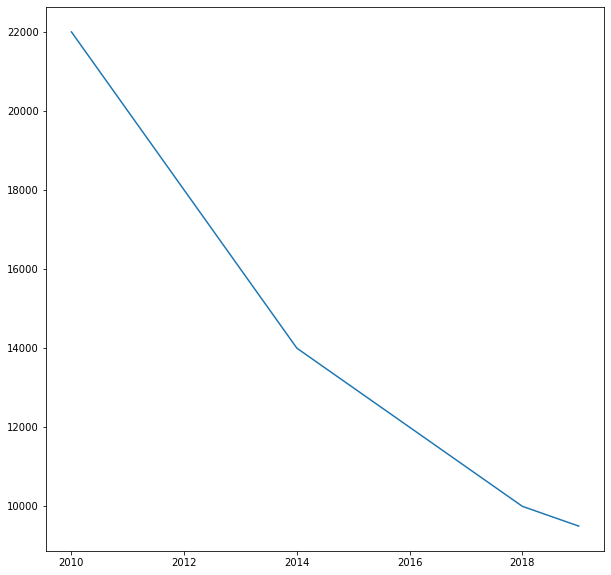

In [179]:
b= deaths[(deaths["Country/Region"] == "Global")]
years=[2010,2011,2012,2013,2014,2015,2016,2017,2018,2019]
y= b[(b["Sex"] == "Both")]["Value"]
plt.plot(years,y)
print(y)

In this graph, we can see that fortunately the number of deaths caused by HIV are decreasing with the years.

In 2010, there were 220000 children deaths and by 2019 this number has decreased to 95000.

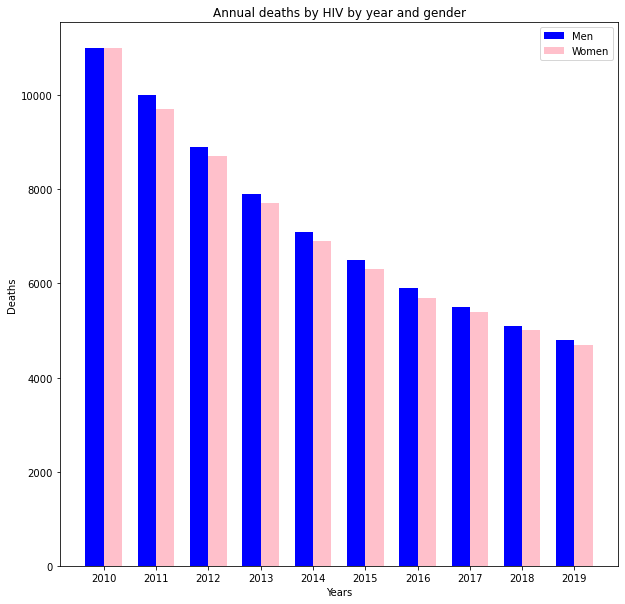

In [180]:
men = b[(b["Sex"] == "Male")]["Value"]
women= b[(b["Sex"] == "Female")]["Value"]

x = np.arange(len(years))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_ylabel('Deaths')
ax.set_title('Annual deaths by HIV by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

From the previous graph, we can easily see how the number of deaths is a bit greater for boys than for girls.

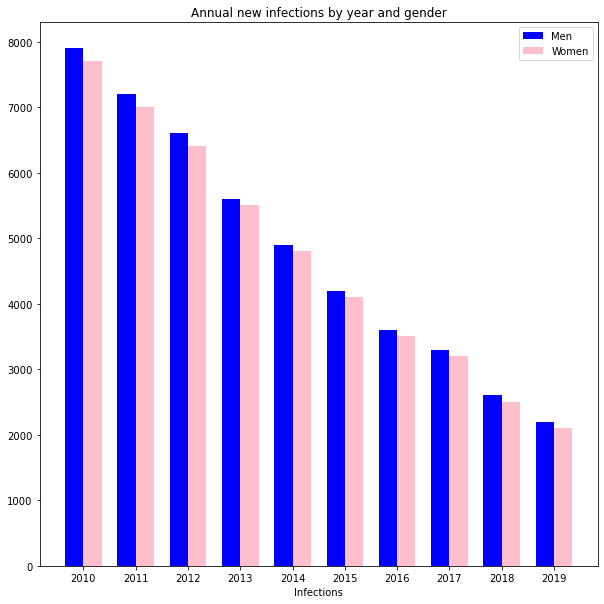

In [181]:
c= deaths[(deaths["Country/Region"] == "Kenya")]

men = c[(c["Sex"] == "Male")]["Value"]
women= c[(c["Sex"] == "Female")]["Value"]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_xlabel('Infections')
ax.set_title('Annual new infections by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

In [182]:
print(women)

1201    7700
1204    7000
1207    6400
1210    5500
1213    4800
1216    4100
1219    3500
1222    3200
1225    2500
1228    2100
Name: Value, dtype: object


TODO: IN THIS GRAPHS VALUES ARE MULTIPLIED BY 100, I CAN´T SEE WHY. MAYBE IS IN THE CONVERT CODE. I MULTIPLIED THEM BY 1000, SO YOU CAN JUST CONVERT THEM WITHOUT MULTIPLYING, THE SAME HAPPENS IN INFECTIONS PARTS. values should be 7700,7000...

In the previous graph, we showed the number of cases in Kenya, we can make the same graph with any country just changing the name of the country.

NOTE: You will not find all the countries because many of them have no data or it is incomplete.

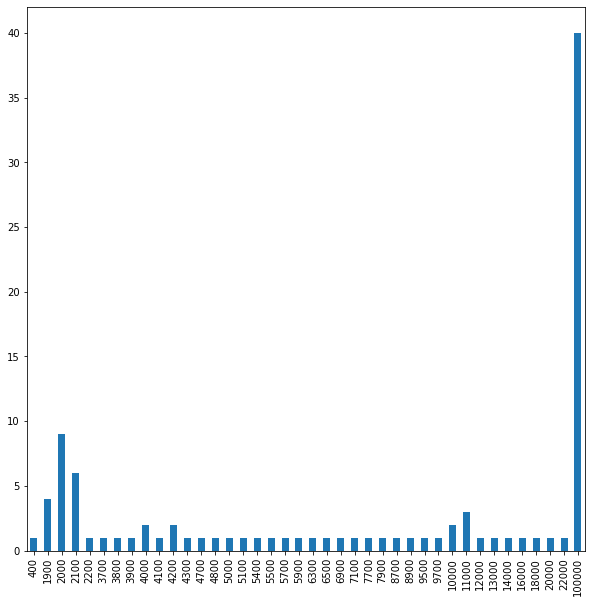

In [183]:
from numpy import histogram as hist
#hist(vals)
#hist = deaths[:30]["Value"].hist(bins = 50)
deaths["Value"][:100].value_counts().sort_index().plot(kind="bar")

deaths - upper/lower


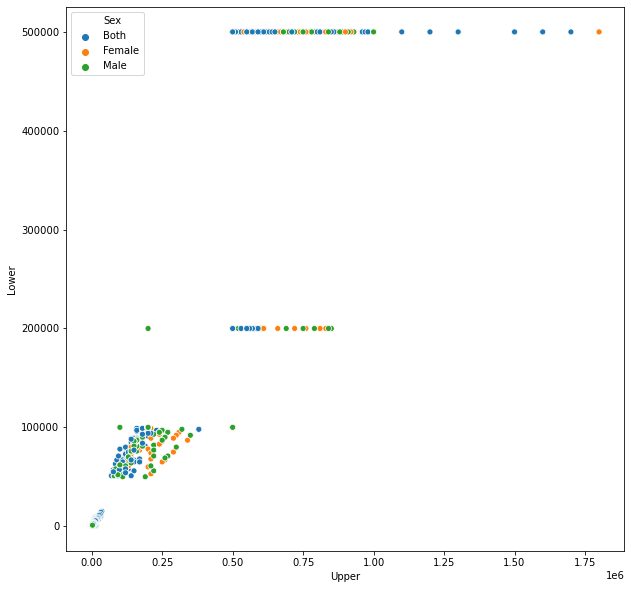

In [184]:
print("deaths - upper/lower")
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=deaths, hue='Sex')
plt.show()

In [91]:
countries = []
values = []
for country in deaths["Country/Region"].unique():
    avg, mean, count, total = 0,0,0,0
    for i in range(len(deaths)):
        if deaths["Country/Region"][i] == country:
            count += 1
            total += deaths["Value"][i]
        
    countries.append(country)
    values.append(total/count)
    #print(country+": "+str(total/count))
            

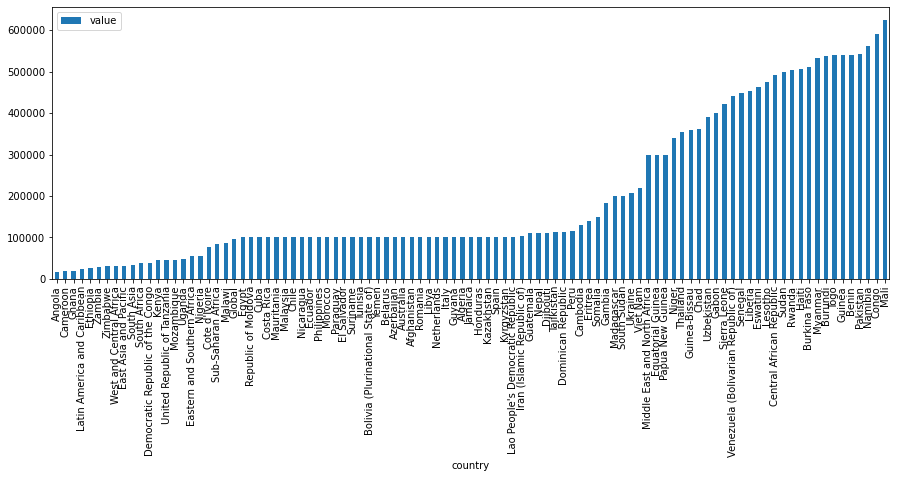

In [92]:
#deaths.plot(x="Country/Region",y='Value', kind='scatter')
# this /\ doesn't really have any kind of deduction-ready info

#this, however, does
plt.rcParams["figure.figsize"] = [15, 5]
df = pd.DataFrame({'country':countries, 'value':values})
ax = df.sort_values(by=["value"]).plot.bar(x='country', y='value', rot=90)

<h1>Infections</h1>

In [46]:
infections=pd.read_csv("AnnualNewInfections.csv", sep=",", encoding='latin-1')
print(infections.head())
print(infections.shape)

  Country/Region  Year     Sex Value Lower Upper
0         Global  2010    Both   310   200   500
1         Global  2010  Female   150    97   240
2         Global  2010    Male   160   100   250
3         Global  2011    Both   270   170   430
4         Global  2011  Female   130    85   210
(2940, 6)


In [47]:
#converting data values to numeric, where applicable
i = 0
for val in infections["Value"]:
    try:
        if int(val) < 30:
            val = int(val)*1000
        infections["Value"][i] = int(val)
    except ValueError:
        #todo: compute mean by upper&lower, use for replacing values with "<"
        if val.startswith("<"):
            infections["Value"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
            #deaths["Value"][i] = random.randint(0, int(val[1:]) - 1)
        else:
            infections["Value"][i] = int(float(val.replace(",","."))*100)
            
    i+=1
#---------------------------upper---------------------------------
i=0
for val in infections["Upper"]:
    try:
        if int(val) < 30:
            val = int(val)*1000
        infections["Upper"][i] = int(val)
    except ValueError:
        if val.startswith("<"):
            infections["Upper"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
        else:
            infections["Upper"][i] = int(float(val.replace(",","."))*100)
        
    i+=1
#---------------------------lower--------------------------------
i=0
for val in infections["Lower"]:
    try:
        if int(val) < 30:
            val = int(val)*1000
        infections["Lower"][i] = int(val)
    except ValueError:
        #todo: compute mean by upper&lower, use for replacing values with "<"
        if val.startswith("<"):
            infections["Lower"][i] = int(val[1:]) - 1 #remove "<" and deacrease by 1
        else:
            infections["Lower"][i] = int(float(val.replace(",","."))*100)
            
    i+=1

#-------------------------fixing false values----------------------------------------
for v in range(len(infections)):
    if infections["Value"][v] < infections["Lower"][v] or infections["Value"][v]*10 < infections["Upper"][v]:
        infections["Value"][v] = infections["Value"][v] * 10
    if infections["Upper"][v] < infections["Lower"][v] or infections["Upper"][v] < infections["Value"][v]:
        infections["Upper"][v] = infections["Upper"][v] * 10
    if infections["Lower"][v]*10 < infections["Value"][v] or infections["Lower"][v]*10 < infections["Upper"][v]:
        infections["Lower"][v] = infections["Lower"][v] * 10
        
#for some reason, this check is also needed
for i in range(len(infections["Upper"])):
   #print(str(deaths["Upper"][i]) + " | "+str(deaths["Lower"][i]) +" | "+ str(deaths["Value"][i]))
    if infections["Lower"][i] - infections["Upper"][i] > 0:
        infections["Upper"][i] = infections["Upper"][i]*10

When we compare this dataset with the original one we realized that the values were divided by 1000 because when we saved the new csv, these numbers were with a comma and it took them as decimals. We solved it, as shown below.

In [48]:
infections["Value"] =infections["Value"] * 1000
infections["Lower"] =infections["Lower"] * 1000
infections["Upper"] =infections["Upper"] * 1000
infections.head()

,Country/Region,Year,Sex,Value,Lower,Upper
0,Global,2010,Both,310000,200000,500000
1,Global,2010,Female,150000,97000,240000
2,Global,2010,Male,160000,100000,250000
3,Global,2011,Both,270000,170000,430000
4,Global,2011,Female,130000,85000,210000


0     310000
3     270000
6     240000
9     220000
12    200000
15    190000
18    180000
21    170000
24    160000
27    150000
Name: Value, dtype: object


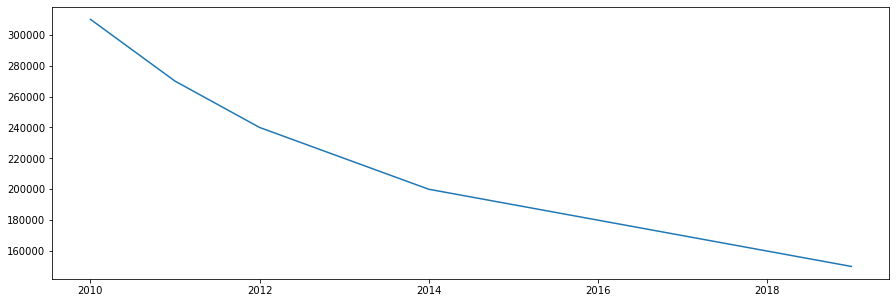

In [49]:
b= infections[(infections["Country/Region"] == "Global")]
y= b[(b["Sex"] == "Both")]["Value"]
plt.plot(years,y)
print(y)

In this graph, we can see that fortunately the new total cases of HIV are decreasig with the years.

In 2010, there were 310000 new cases and in 2019 only 150000, the number was reduced in half.

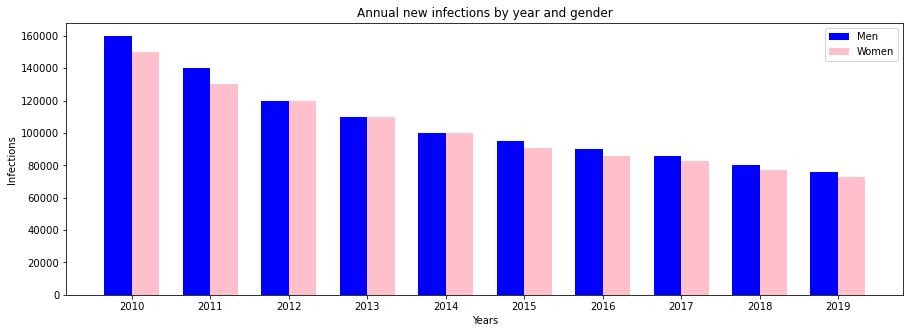

In [50]:
men = b[(b["Sex"] == "Male")]["Value"]
women= b[(b["Sex"] == "Female")]["Value"]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_ylabel('Infections')
ax.set_title('Annual new infections by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

From the previous graph, we can easily see how the number new cases of HIV of children is a bit greater for boys than for girls.

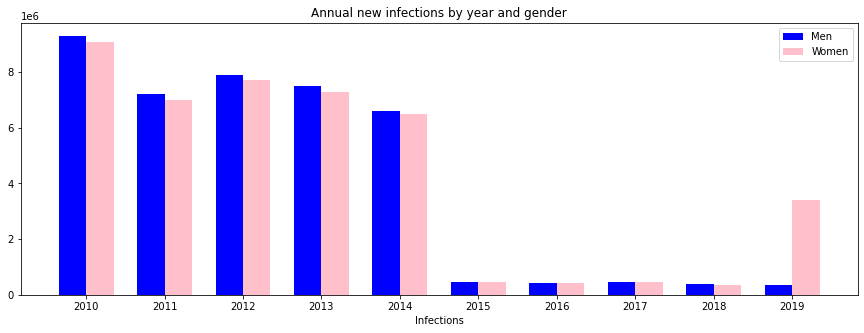

In [51]:
c= infections[(infections["Country/Region"] == "Kenya")]

men = c[(c["Sex"] == "Male")]["Value"]
women= c[(c["Sex"] == "Female")]["Value"]
fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, men, width, label='Men', color='blue')
rects2 = ax.bar(x + width/2, women, width, label='Women', color='pink')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Years')
ax.set_xlabel('Infections')
ax.set_title('Annual new infections by year and gender')
ax.set_xticks(x)
ax.set_xticklabels(years)
ax.legend()
plt.show()

In the previous graph, we showed the number of cases in Kenya, we can make the same graph with any country just changing the name of the country.

NOTE: You will not find all the countries because many of them have no data or it is incomplete.

infections - upper/lower


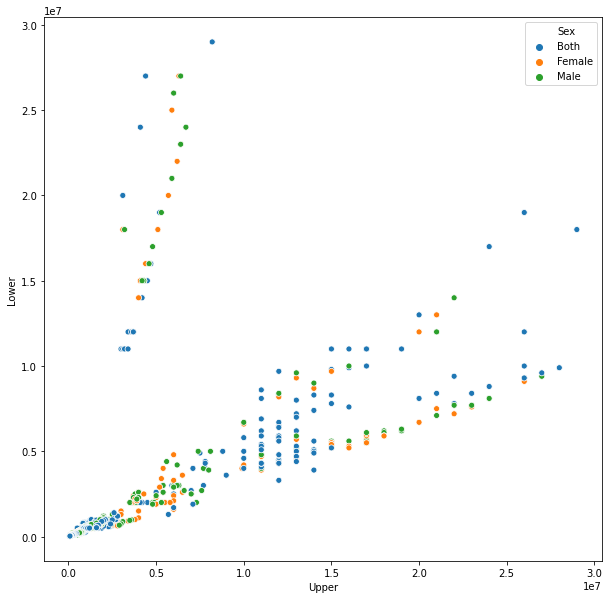

In [52]:
print("infections - upper/lower")
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=infections, hue='Sex')
plt.show()

In [53]:
countries = []
values = []
for country in infections["Country/Region"].unique():
    avg, mean, count, total = 0,0,0,0
    for i in range(len(infections)):
        if infections["Country/Region"][i] == country:
            count += 1
            total += infections["Value"][i]
        
    countries.append(country)
    values.append(total/count)

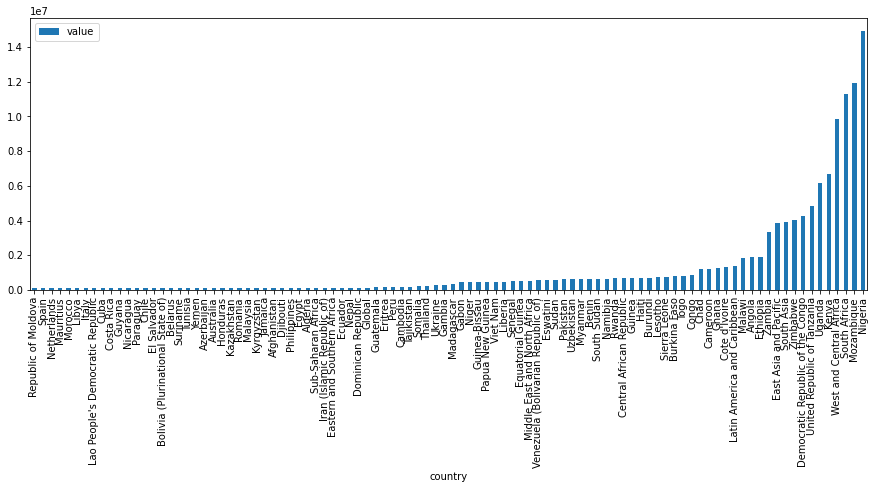

In [54]:
plt.rcParams["figure.figsize"] = [15, 5]
df = pd.DataFrame({'country':countries, 'value':values})
ax = df.sort_values(by=["value"]).plot.bar(x='country', y='value', rot=90) #rotation to see the labels

<h1>Treatments</h1>

Our UNICEF second dataset contained the percentage and the numbers of children(0-14 years) with HIV recieving ART treatment. In this dataset we had different indicators, some of them were the number of children, and the other ones were represented
by percentage. So we realized we couldn´t mix the values to get good results. To solve this problem we joined data as shown below. In this way, we simplify a lot the original data due to most of the information was twice. 

In [55]:
treatments=pd.read_csv("Treatment.csv", sep=";", encoding='latin-1')
print(treatments.shape)
treatments.head()

(930, 7)


,Country,Region,Year,Percentage,Lower,Upper,Number
0,Afghanistan,South Asia,2010,0,0,1.8,0
1,Afghanistan,South Asia,2011,1.8,0.5,4.3,10
2,Afghanistan,South Asia,2012,2.0,0.5,4.7,10
3,Afghanistan,South Asia,2013,3.4,1.7,8.1,10
4,Afghanistan,South Asia,2014,4.6,2.2,11.1,20


<BarContainer object of 10 artists>

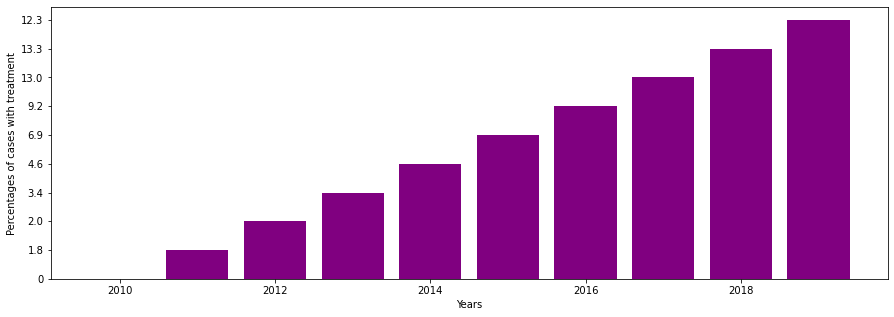

In [56]:
c= treatments[(treatments["Country"] == "Afghanistan")]
plt.xlabel('Years')
plt.ylabel('Percentages of cases with treatment')
plt.bar(years, height= c["Percentage"] , width=0.8, bottom=None, align='center', color="purple")

<BarContainer object of 10 artists>

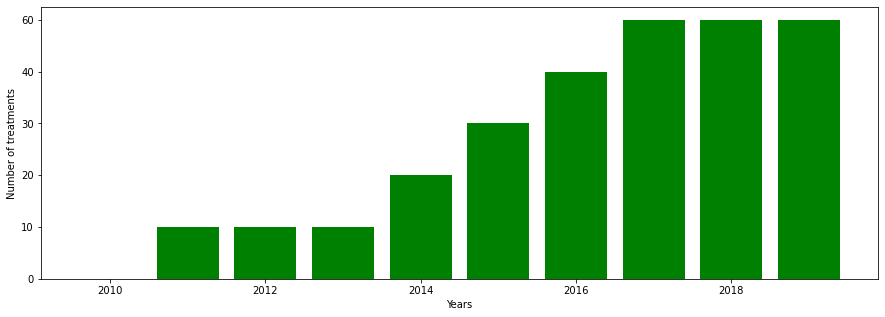

In [57]:
plt.xlabel('Years')
plt.ylabel('Number of treatments')
plt.bar(years, height= c["Number"] , width=0.8, bottom=None, align='center', color = "green")

We can see how the number of treatments are increasing with the years as wel as the percentages of cases covered. We can analyze different countries just changing the name of the country.

<h1>NB! currently using just random.randint/uniform ,need more elegant solution!</h1>

In [58]:
#random.uniform(start, stop): returns float between start and stop

#for every row
for i in range(len(treatments)):
     #upper
    upper = treatments["Upper"][i]
    #in this case, only "<1":
    if str(upper).startswith("<"):
        treatments["Upper"][i] = random.uniform(0.5,float(upper[1:])) #random from 0.5 to value (aka 1)
    #in this case, only ">95":
    elif str(upper).startswith(">"):
        treatments["Upper"][i] = random.uniform(float(upper[1:]), 100) #random from value(aka 95) to 
    else:
        treatments["Upper"][i] = float(treatments["Upper"][i])
        
    
    #lower
    lower = treatments["Lower"][i]
    if str(lower).startswith("<"): #aka <1:
        treatments["Lower"][i] = random.uniform(0,0.5) #random from 0 to 0.5 
    elif str(lower).startswith(">"):
        treatments["Lower"][i] = random.uniform(float(lower[1:]), treatments["Upper"][i]) #random from value to upper (cant be higher than upper!)
    else:
        treatments["Lower"][i] = float(treatments["Lower"][i])
        
    #percentage
    percentage = treatments["Percentage"][i]
    if str(percentage).startswith("<") or str(percentage).startswith(">") : #aka <1 or >95
        treatments["Percentage"][i] = random.uniform(treatments["Lower"][i], treatments["Upper"][i]) #random from lower to higher
    else:
        treatments["Percentage"][i] = float(treatments["Percentage"][i])
    
    
    #print(str(treatments["Percentage"][i]) + " | "+ str(treatments["Lower"][i]) + " | "+str(treatments["Upper"][i]))
    

infections - upper/lower


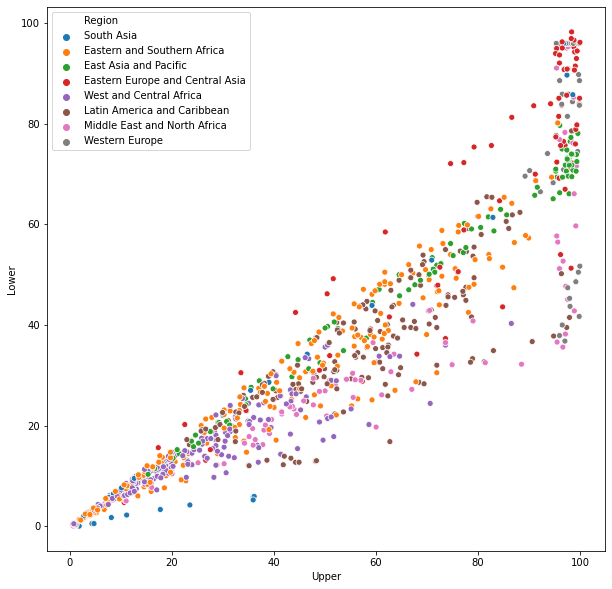

In [59]:
#treatments- graphing
print("infections - upper/lower")
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=treatments, hue='Region')
plt.show()

In [60]:
#treatments.plot(x="Region",y='Upper', kind='scatter') #almost unreadable

Finally, we separated one dataset to get one with analysis divided in 7 UNICEF regions. These regions are: Eastern and Southern Africa, Sub-Saharan Africa, East and North Africa, Latin America and Caribbean, Middle  South Asia, East Asia and Pacific, West and Central Africa with values of years from 2010-2019.

In [61]:
regions=pd.read_csv("Global.csv", sep=";", encoding='latin-1', header=None, names= ["Region","Year","Percentage","Lower","Upper", "Number"])
print(regions.shape)
print(regions.head())

(80, 6)
                  Region  Year  Percentage  Lower Upper  Number
0  East Asia and Pacific  2010        35.5   24.0  44.0   19500
1  East Asia and Pacific  2011        38.3   25.0  48.0   21700
2  East Asia and Pacific  2012        39.6   26.0  49.0   22900
3  East Asia and Pacific  2013        42.1   28.0  52.0   24900
4  East Asia and Pacific  2014        44.1   29.0  55.0   26400


In [62]:
#converting neccesary values to numeric

#some values are still in the shape of ">95"
for i in range(len(regions)):
    #upper
    if str(regions["Upper"][i]).startswith(">"):
        regions["Upper"][i] = float(regions["Upper"][i][1:])
    else:
        regions["Upper"][i] = float(regions["Upper"][i])
        
    #percentage
    regions["Percentage"][i] = float(regions["Percentage"][i])
    
    #lower
    regions["Lower"][i] = float(regions["Lower"][i])
    
    #number
    regions["Number"][i] = int(regions["Number"][i])

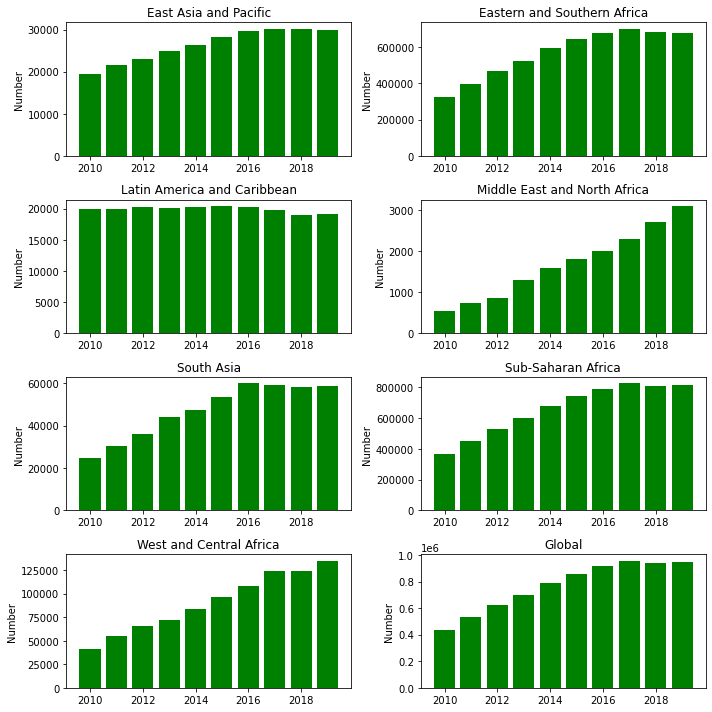

In [73]:
c= regions[(regions["Region"] == "Global")]

fig, axs = plt.subplots(4, 2)
axs[0, 0].bar(years, height= regions[(regions["Region"] == "East Asia and Pacific")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[0, 0].set_title("East Asia and Pacific")
axs[0, 1].bar(years, height= regions[(regions["Region"] == "Eastern and Southern Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[0, 1].set_title("Eastern and Southern Africa")
axs[1, 0].bar(years, height= regions[(regions["Region"] == "Latin America and Caribbean")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[1, 0].set_title("Latin America and Caribbean")
axs[1, 1].bar(years, height= regions[(regions["Region"] == "Middle East and North Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[1, 1].set_title("Middle East and North Africa")
axs[2, 0].bar(years, height= regions[(regions["Region"] == "South Asia")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[2, 0].set_title("South Asia")
axs[2, 1].bar(years, height= regions[(regions["Region"] == "Sub-Saharan Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[2, 1].set_title("Sub-Saharan Africa")
axs[3, 0].bar(years, height= regions[(regions["Region"] == "West and Central Africa")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[3, 0].set_title("West and Central Africa")
axs[3, 1].bar(years, height= regions[(regions["Region"] == "Global")]["Number"] , width=0.8, bottom=None, align='center', color = "green")
axs[3, 1].set_title("Global")
axs[0,0].set_xlabel("East Asia and Pacific")


for ax in axs.flat:
    ax.set(xlabel='', ylabel='Number')
# Hide x labels and tick labels for top plots and y ticks for right plots.

fig.tight_layout()


TODO: IN THE PREVIOUS GRAPH WE CAN REMOVE BOTH AXIS VALUES, HOWEVER Y VALUES AREN´T THE SAME. I DON´T KNOW HOW TO REMOVE ONLY X AXIS.

In the graphs before ..... fill it when previous part is solved

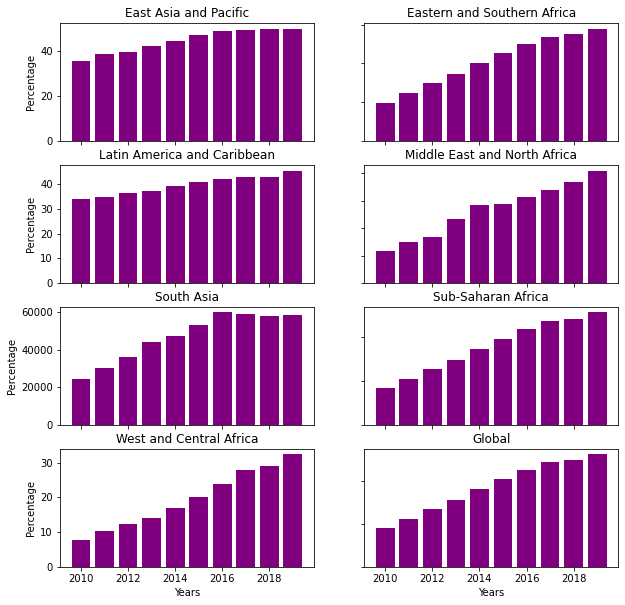

In [33]:
c= regions[(regions["Region"] == "Global")]

fig, axs = plt.subplots(4, 2)
axs[0, 0].bar(years, height= regions[(regions["Region"] == "East Asia and Pacific")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[0, 0].set_title("East Asia and Pacific")
axs[0, 1].bar(years, height= regions[(regions["Region"] == "Eastern and Southern Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[0, 1].set_title("Eastern and Southern Africa")
axs[1, 0].bar(years, height= regions[(regions["Region"] == "Latin America and Caribbean")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[1, 0].set_title("Latin America and Caribbean")
axs[1, 1].bar(years, height= regions[(regions["Region"] == "Middle East and North Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[1, 1].set_title("Middle East and North Africa")
axs[2, 0].bar(years, height= regions[(regions["Region"] == "South Asia")]["Number"] , width=0.8, bottom=None, align='center', color = "purple")
axs[2, 0].set_title("South Asia")
axs[2, 1].bar(years, height= regions[(regions["Region"] == "Sub-Saharan Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[2, 1].set_title("Sub-Saharan Africa")
axs[3, 0].bar(years, height= regions[(regions["Region"] == "West and Central Africa")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[3, 0].set_title("West and Central Africa")
axs[3, 1].bar(years, height= regions[(regions["Region"] == "Global")]["Percentage"] , width=0.8, bottom=None, align='center', color = "purple")
axs[3, 1].set_title("Global")


for ax in axs.flat:
    ax.set(xlabel='Years', ylabel='Percentage')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axs.flat:
    ax.label_outer()

C:\Users\hppp\anaconda3\envs\ITDS\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


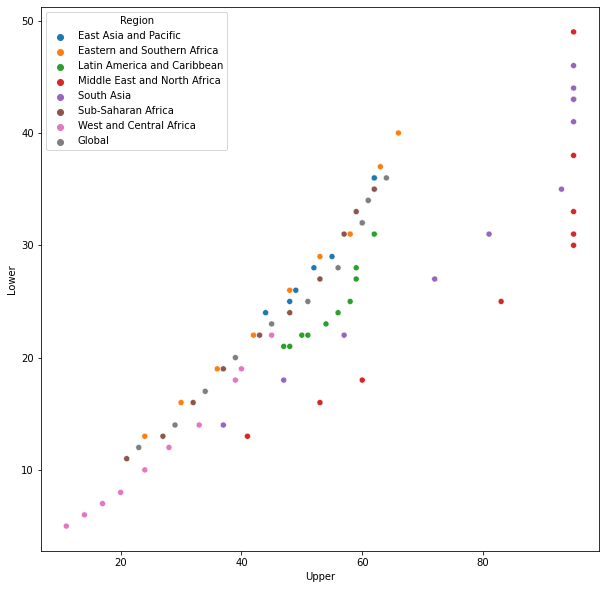

In [34]:
#still need to work on that graph
plt.rcParams['figure.figsize'] = [10, 10]
sns.scatterplot('Upper', 'Lower', data=regions, hue='Region')
plt.show()

<center> Thank you </center>